### CA - 03 Decision Tree Algorithm

In [1]:
#import nessesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

In [2]:
df = pd.read_csv('https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true')

### Part 1: Data Understanding / Exporation

Q1.Why does it make sense to discretize columns for this problem?
It simplifies the continuous numerical variables by converting them into categorical bins. These bins are then much easier for the the machine learning model to make decisions on. Because at each split of the decision tree less branches are coming for the nodes as only a few bin options are avaliable.

Q2.What might be the issues if we DID NOT discretize the columns?
Without discretization, the continuous variables would make the model very large and complex. These will lead to issues such as overfitting and reducing the explainability of the model.

In [3]:
#print first 5 rows of the dataframe
df.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0


In [4]:
#print the shape of the dataframe
df.shape

(48842, 11)

# display descriptive statistics of each column

C:\Users\henry\AppData\Local\Temp\ipykernel_9584\3266578157.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette="coolwarm")
C:\Users\henry\AppData\Local\Temp\ipykernel_9584\3266578157.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette="coolwarm")
C:\Users\henry\AppData\Local\Temp\ipykernel_9584\3266578157.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette="coolwarm")
C

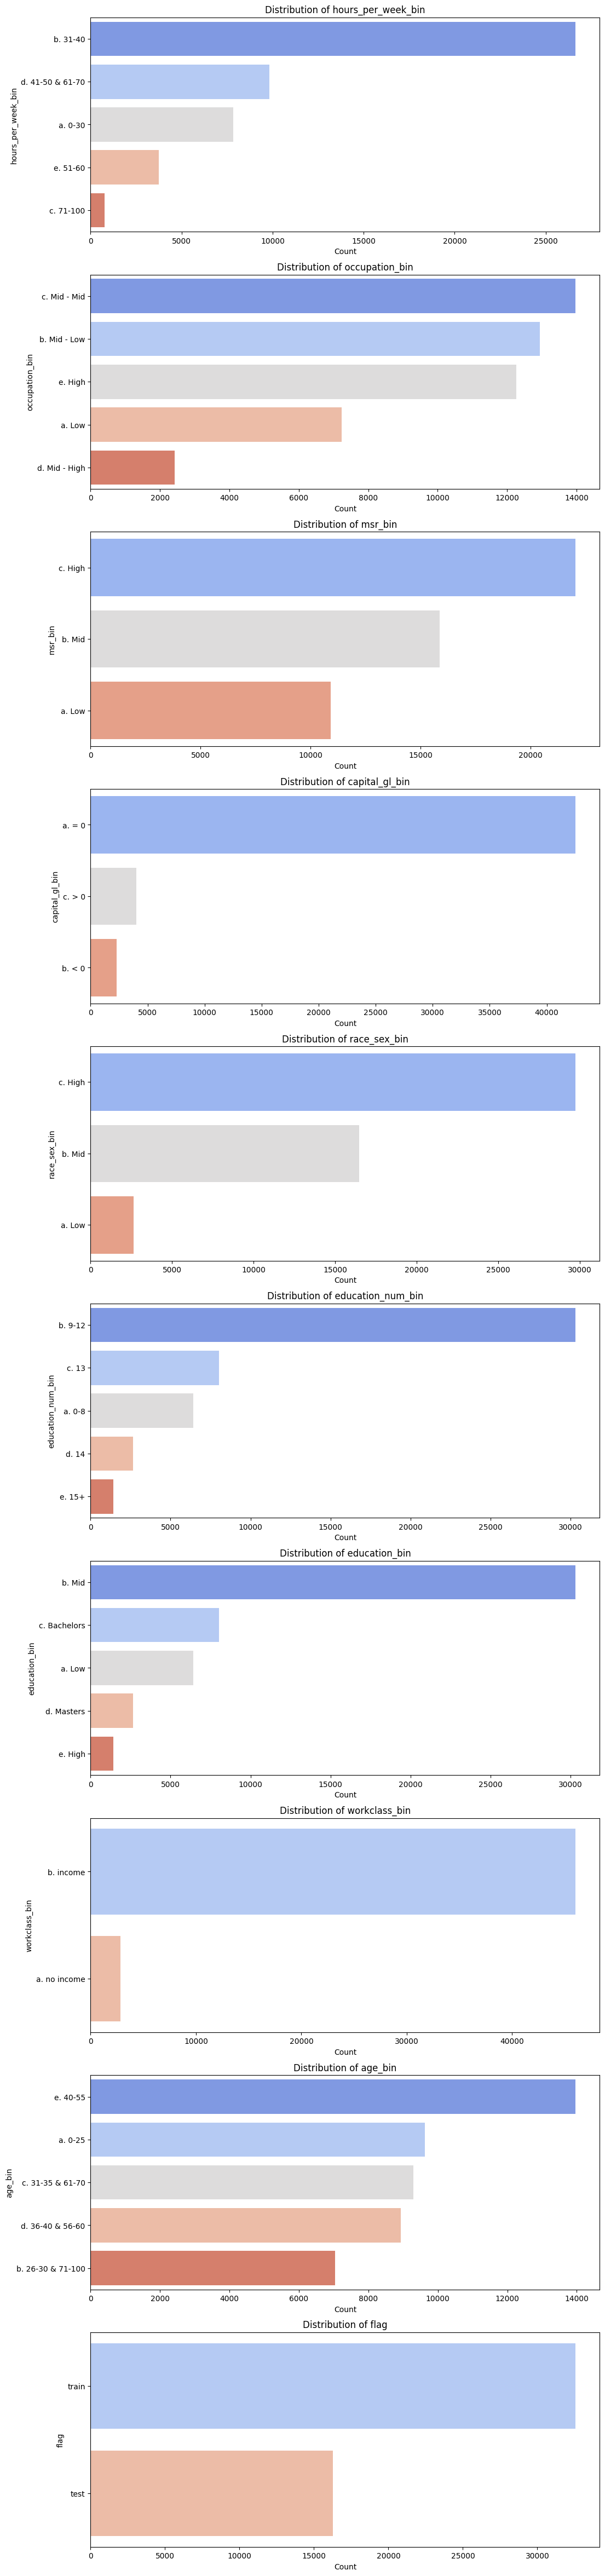

In [5]:

# Select categorical (binned) columns
cat_cols = df.select_dtypes(exclude=['number']).columns

# Set up the figure size
plt.figure(figsize=(12, 6 * len(cat_cols)))

# Loop through categorical columns and create count plots
for i, col in enumerate(cat_cols, 1):
    plt.subplot(len(cat_cols), 1, i)
    sns.countplot(y=df[col], order=df[col].value_counts().index, palette="coolwarm")
    plt.title(f"Distribution of {col}")
    plt.xlabel("Count")
    plt.ylabel(col)
    

plt.show()

### 2. Data Quality Analysis

Auto viz is commented out because on my system running it caused issues with matplotlib. 
The report generated from autoviz showed no data quality issues.
Uncommenting the code will allow for view of the data quality report, but if matplotlib issues are not just my system, recomment out code to view graphs later in code.

In [6]:
#from autoviz import AutoViz_Class
#AV = AutoViz_Class()

In [7]:
#df_AV = AV.AutoViz(df)

In [8]:
# Check for missing values
print(df.isnull().sum())

hours_per_week_bin    0
occupation_bin        0
msr_bin               0
capital_gl_bin        0
race_sex_bin          0
education_num_bin     0
education_bin         0
workclass_bin         0
age_bin               0
flag                  0
y                     0
dtype: int64


### 3. Build Decision Tree Classifier Models

In [9]:
# Identify categorical columns excluding "flag"
categorical_cols = df.select_dtypes(include=["object"]).columns
categorical_cols = categorical_cols[categorical_cols != "flag"]  # Exclude "flag"

# Perform one-hot encoding on the selected categorical columns
if len(categorical_cols) > 0:
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [10]:
# Example: Assuming 'flag' column contains 'train' or 'test' labels
train_df = df[df["flag"] == "train"]
test_df = df[df["flag"] == "test"]

# If you need to extract features (X) and target (y)
X_train = train_df.drop(columns=["y", "flag"])  # Exclude target and split indicator
y_train = train_df["y"]

X_test = test_df.drop(columns=["y", "flag"])
y_test = test_df["y"]


In [11]:
dtree = DecisionTreeClassifier(max_depth=10, random_state=31,
                               max_features=None, min_samples_leaf=15)

dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

### 4. Evaluate Decision Tree Performance

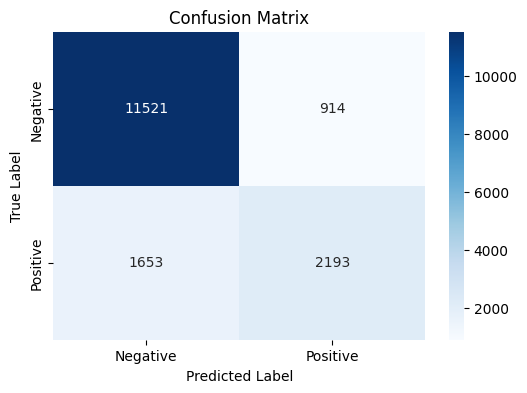

In [12]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [13]:
# Compute accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.8423
Precision: 0.7058
Recall: 0.5702
F1 Score: 0.6308


In [14]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90     12435
           1       0.71      0.57      0.63      3846

    accuracy                           0.84     16281
   macro avg       0.79      0.75      0.77     16281
weighted avg       0.83      0.84      0.84     16281



### 5. Tune Decision Tree Performance

Q5. Decision Tree Hyper-parameter variation vs. performance
Hyperparameters like criterion, max_features, min_samples_leaf, and max_depth affect accuracy. By varying them and evaluating accuracy, we can determine the best performing combination.

In [15]:
results_criterion = []
criteria = ['gini', 'entropy']

for criterion in criteria:
    # Create and train the model
    dtree = DecisionTreeClassifier(criterion=criterion, random_state=31)
    dtree.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = dtree.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='macro')
    precision = precision_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    
    # Append results
    results_criterion.append([criterion, accuracy, recall, precision, f1])

# Create DataFrame
df_criterion = pd.DataFrame(results_criterion, columns=['Criterion', 'Accuracy', 'Recall', 'Precision', 'F1 Score'])

# Display the DataFrame
print(df_criterion)


  Criterion  Accuracy    Recall  Precision  F1 Score
0      gini  0.836128  0.738991   0.780415  0.755614
1   entropy  0.836005  0.739090   0.780115  0.755585


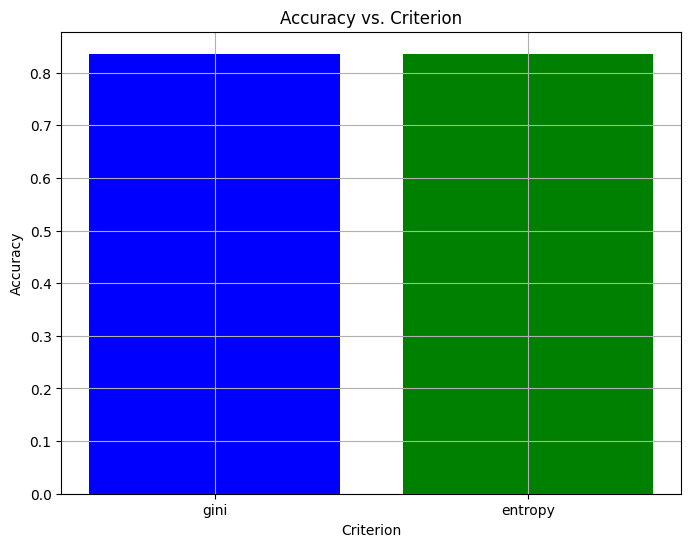

In [16]:
# Assuming df_criterion from the fourth code snippet
plt.figure(figsize=(8, 6))
plt.bar(df_criterion['Criterion'], df_criterion['Accuracy'], color=['b', 'g'])
plt.title('Accuracy vs. Criterion')
plt.xlabel('Criterion')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

gini has a very slightly better Accuracy

In [17]:
results = []
mini_samples_leafs = [1, 5, 10, 15, 20, 25, 30, 35, 40]
for leafs in mini_samples_leafs:
    # Create and train the model
    dtree = DecisionTreeClassifier(criterion='gini', random_state=31, min_samples_leaf=leafs)
    dtree.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = dtree.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='macro')  # You can change the average method as needed
    precision = precision_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    
    # Append results
    results.append([leafs, accuracy, recall, precision, f1])

# Create DataFrame
results_df = pd.DataFrame(results, columns=['min_samples_leaf', 'Accuracy', 'Recall', 'Precision', 'F1 Score'])

# Display the DataFrame
print(results_df)

   min_samples_leaf  Accuracy    Recall  Precision  F1 Score
0                 1  0.836128  0.738991   0.780415  0.755614
1                 5  0.838462  0.743033   0.783893  0.759549
2                10  0.839813  0.743649   0.786590  0.760858
3                15  0.840305  0.743881   0.787580  0.761340
4                20  0.840059  0.743540   0.787178  0.760973
5                25  0.839383  0.744355   0.785367  0.760945
6                30  0.839260  0.740862   0.786537  0.758887
7                35  0.840059  0.740307   0.788599  0.759134
8                40  0.839322  0.738747   0.787618  0.757712


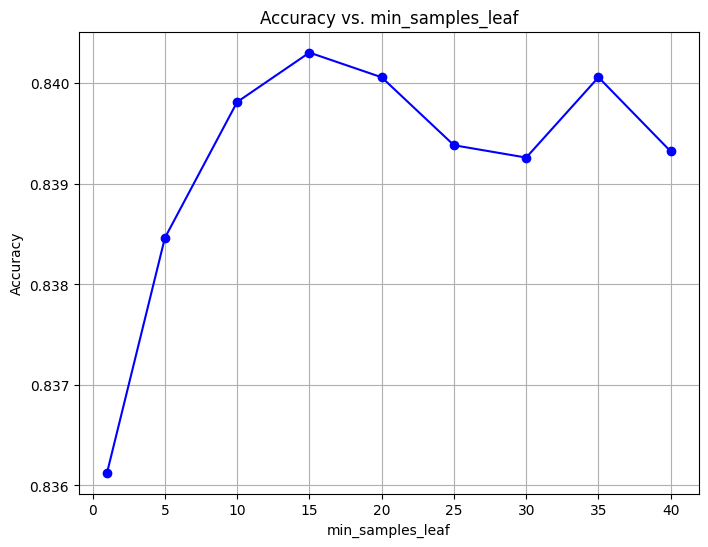

In [18]:
# Assuming results_df from the first code snippet
plt.figure(figsize=(8, 6))
plt.plot(results_df['min_samples_leaf'], results_df['Accuracy'], marker='o', linestyle='-', color='b')
plt.title('Accuracy vs. min_samples_leaf')
plt.xlabel('min_samples_leaf')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


15 min leafs has best accuracy

In [19]:
results_max_features = []
max_features = [None, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for feature in max_features:
    # Create and train the model
    dtree = DecisionTreeClassifier(criterion='gini', random_state=31, max_features=feature,
                                   min_samples_leaf=15)
    dtree.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = dtree.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='macro')
    precision = precision_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    
    # Append results
    results_max_features.append([feature, accuracy, recall, precision, f1])

# Create DataFrame
df_max_features = pd.DataFrame(results_max_features, columns=['Max_features', 'Accuracy', 'Recall', 'Precision', 'F1 Score'])

# Display the DataFrame
print(df_max_features)


   Max_features  Accuracy    Recall  Precision  F1 Score
0           NaN  0.840305  0.743881   0.787580  0.761340
1           0.3  0.839445  0.745293   0.785134  0.761511
2           0.4  0.837848  0.734280   0.786272  0.754058
3           0.5  0.837602  0.737981   0.784048  0.756061
4           0.6  0.839690  0.739887   0.787945  0.758631
5           0.7  0.840182  0.742723   0.787801  0.760599
6           0.8  0.840366  0.743651   0.787813  0.761255
7           0.9  0.840182  0.742902   0.787723  0.760701


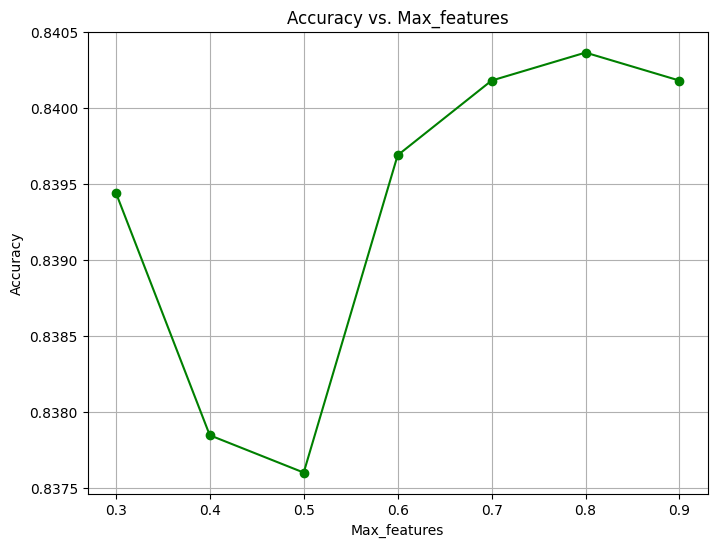

In [20]:
# Assuming df_max_features from the second code snippet
plt.figure(figsize=(8, 6))
plt.plot(df_max_features['Max_features'], df_max_features['Accuracy'], marker='o', linestyle='-', color='g')
plt.title('Accuracy vs. Max_features')
plt.xlabel('Max_features')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

Max Features of 0.8 is best result

In [21]:
results_max_depth = []
max_depth = [2, 4, 6, 8, 10, 12, 14, 16]

for depth in max_depth:
    # Create and train the model
    dtree = DecisionTreeClassifier(criterion='entropy', random_state=31, max_depth=depth,
                                   min_samples_leaf=15, max_features=0.8)
    dtree.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = dtree.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='macro')
    precision = precision_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    
    # Append results
    results_max_depth.append([depth, accuracy, recall, precision, f1])

# Create DataFrame
df_max_depth = pd.DataFrame(results_max_depth, columns=['Max_depth', 'Accuracy', 'Recall', 'Precision', 'F1 Score'])

# Display the DataFrame
print(df_max_depth)


   Max_depth  Accuracy    Recall  Precision  F1 Score
0          2  0.816596  0.671968   0.765489  0.696754
1          4  0.830354  0.745269   0.767373  0.755055
2          6  0.834654  0.732908   0.779568  0.751048
3          8  0.839076  0.726644   0.793513  0.750209
4         10  0.839260  0.733858   0.789865  0.754783
5         12  0.840980  0.740462   0.790665  0.759877
6         14  0.839260  0.741760   0.786154  0.759398
7         16  0.842270  0.745796   0.791151  0.763828


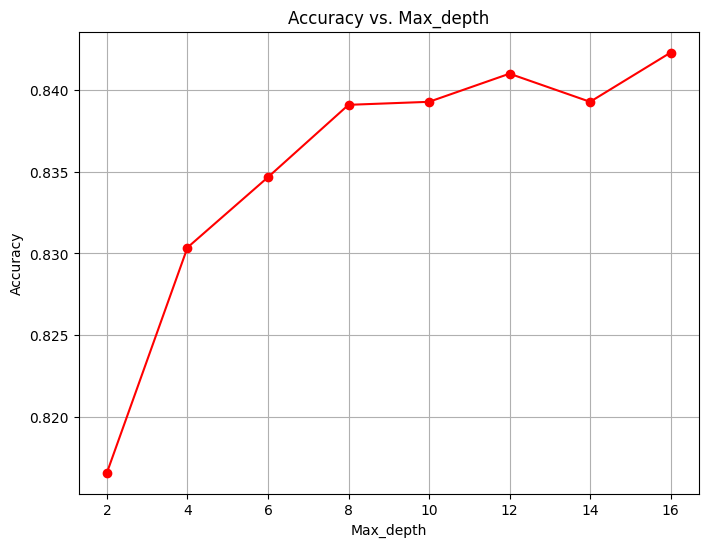

In [22]:
# Assuming df_max_depth from the third code snippet
plt.figure(figsize=(8, 6))
plt.plot(df_max_depth['Max_depth'], df_max_depth['Accuracy'], marker='o', linestyle='-', color='r')
plt.title('Accuracy vs. Max_depth')
plt.xlabel('Max_depth')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


Best Max depth = 16

### 6. Visualize Your Best Decision Tree using GraphViz

In [23]:
# Train the DecisionTreeClassifier using best parameters
dtree = DecisionTreeClassifier(criterion='entropy', random_state=31, max_depth=16,
                                min_samples_leaf=15, max_features=0.8)
dtree.fit(X_train, y_train)

# Predict on the test set
y_pred = dtree.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print all metrics
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")


Accuracy: 0.8422701308273448
Recall: 0.745795798056289
Precision: 0.7911507934581548
F1 Score: 0.7638279175213605


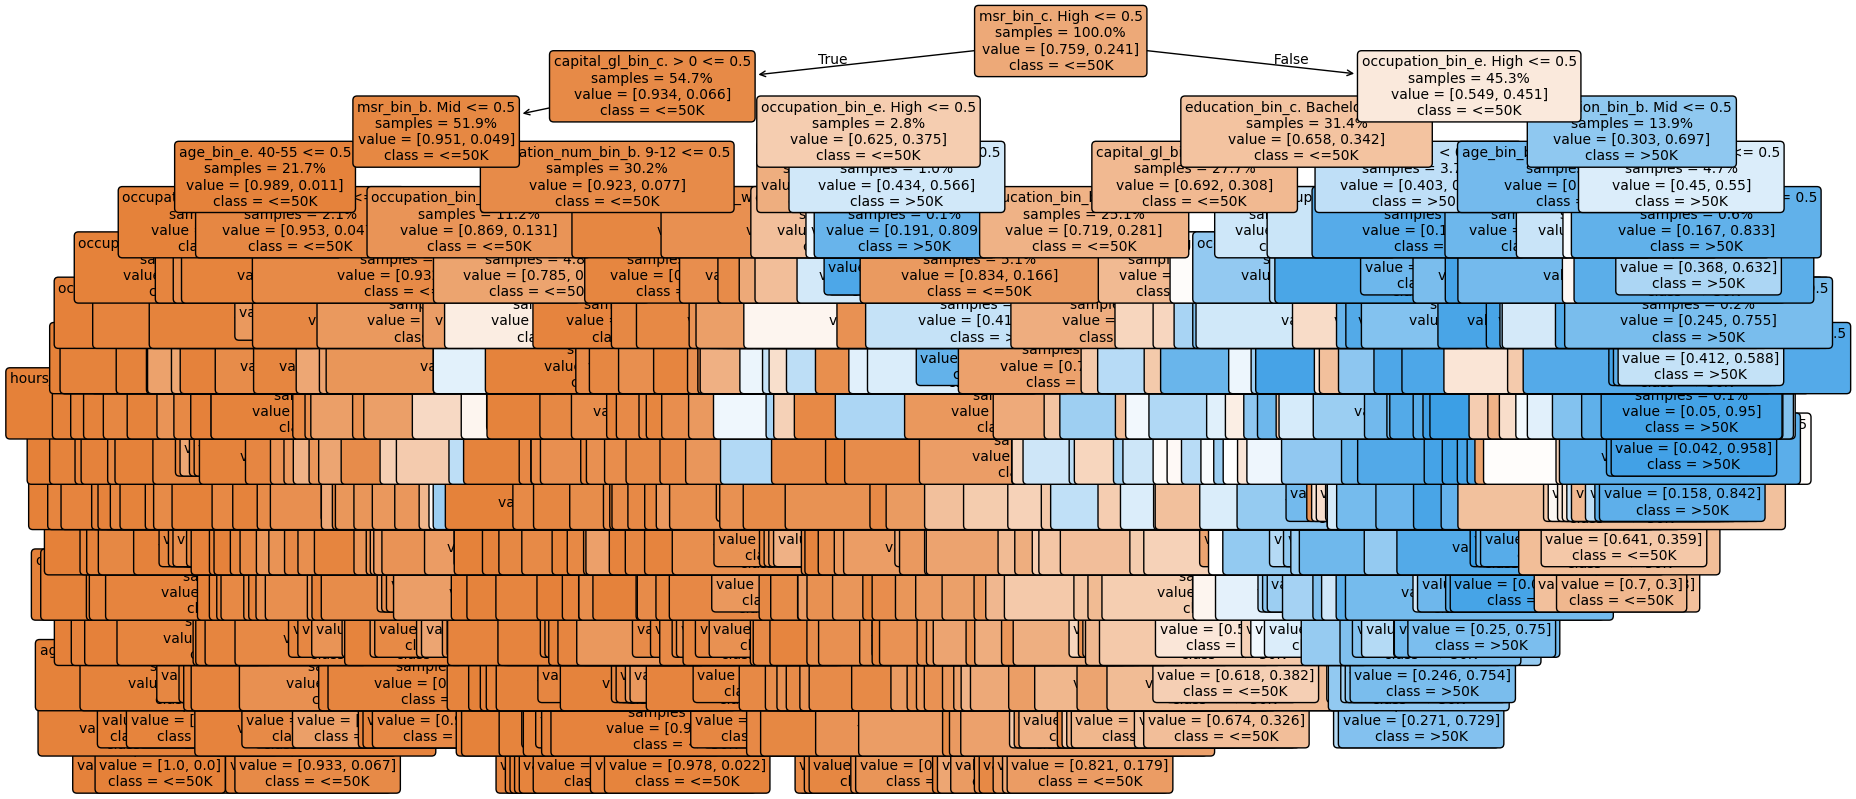

In [29]:
plt.figure(figsize=(20, 10))  # Increase figure size
plot_tree(
    dtree, 
    feature_names=X_train.columns, 
    class_names=['<=50K', '>50K'], 
    filled=True, 
    rounded=True, 
    fontsize=10,  # Increase font size
    impurity=False,  # Hide impurity values for clarity
    proportion=True  # Show class distribution instead of sample count
)
plt.show()


Code for graphviz does not run on my machine but I think it should be correct code. just issue with graphviz path location on my machine.

In [27]:
from sklearn.tree import export_graphviz
import graphviz

# Ensure feature names are properly formatted (remove special characters if necessary)
clean_feature_names = [
    name.replace('[', '').replace(']', '').replace('<', '').replace('>', '')
    .replace(';', '').replace(' ', '_') for name in X_train.columns
]

# Export the decision tree to Graphviz format
dot_data = export_graphviz(
    dtree,  # Your trained decision tree model
    out_file=None,  
    feature_names=clean_feature_names,  # Use cleaned feature names
    class_names=['<=50K', '>50K'],  # Class labels
    filled=True,  
    rounded=True,  
    special_characters=True  
)

# Create and display the Graphviz visualization
graph = graphviz.Source(dot_data)

# Render as a PDF file
graph.render("Best_Decision_Tree")  # Saves as 'Best_Decision_Tree.pdf'
graph.view()  # Opens the visualization


Error: Best_Decision_Tree: syntax error in line 480 near ';'


CalledProcessError: Command '[WindowsPath('dot'), '-Kdot', '-Tpdf', '-O', 'Best_Decision_Tree']' returned non-zero exit status 1. [stderr: b"Error: Best_Decision_Tree: syntax error in line 480 near ';'\r\n"]

### 7. Conclusion

Q4. How long was your total run time to train the best model?
only a few seconds

Q5. Did you find the BEST TREE?
Probably not. there are almost infinte possiblities for generating trees and tons of hyper parameters that were not tested. But for the hyperparameters tested I did find the best tree.

Q6. Write your observations from the visualization of the best tree
I could not get graphviz to work so I used plottree. This did not give me a very clear view of the data but I identified the first two splits being msr_bin being true or false then if occupation_bin is high on one branch and if capital_gl is between 0 and .5 on the other.

Q7. Will this Tree “overfit”? (Hint: Is this tree “fully grown”?)
I don't believe the tree is fully grown or spliting on every possible feature. However given the complexity of the tree I would assume that the tree is experiencing some degree of overfitting.

### 8. Prediction Using your "trained" Decision Model

In [28]:
# Define the new individual's data
# Data has to match input data for trained model
new_data = {
    'hours_per_week_bin_b. 31-40': [False],
    'hours_per_week_bin_c. 71-100': [False],
    'hours_per_week_bin_d. 41-50 & 61-70': [True],
    'hours_per_week_bin_e. 51-60': [False],
    'occupation_bin_b. Mid - Low': [True],
    'occupation_bin_c. Mid - Mid': [False],
    'occupation_bin_d. Mid - High': [False],
    'occupation_bin_e. High': [False],
    'msr_bin_b. Mid': [False],
    'msr_bin_c. High': [True],
    'capital_gl_bin_b. < 0': [False],
    'capital_gl_bin_c. > 0': [True],
    'race_sex_bin_b. Mid': [True],
    'race_sex_bin_c. High': [False],
    'education_num_bin_b. 9-12': [True],
    'education_num_bin_c. 13': [False],
    'education_num_bin_d. 14': [False],
    'education_num_bin_e. 15+': [False],
    'education_bin_b. Mid': [False],
    'education_bin_c. Bachelors': [False],
    'education_bin_d. Masters': [False],
    'education_bin_e. High': [True],
    'workclass_bin_b. income': [True],
    'age_bin_b. 26-30 & 71-100': [False],
    'age_bin_c. 31-35 & 61-70': [False],
    'age_bin_d. 36-40 & 56-60': [True],
    'age_bin_e. 40-55': [False]
}

# Convert to DataFrame
new_df = pd.DataFrame(new_data)

# Ensure new_df has the same columns as X_train
new_df = new_df[X_train.columns]  # Align columns

# Make the prediction
prediction = dtree.predict(new_df)
prediction_proba = dtree.predict_proba(new_df)

# Print results
print(f"Predicted Income Category: {prediction[0]}")
print(f"Probability of prediction (<=50K or >50K): {prediction_proba[0]}")


Predicted Income Category: 0
Probability of prediction (<=50K or >50K): [0.72413793 0.27586207]


Q8. What is the probability that your prediction for this person is correct?
Based on the output, the model is about 72.4% confident that a person with the given characteristics will have an income of <=50k